## Notebook to control trading components

In [1]:
# import main modules
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import numpy as np
import pandas as pd
import pickle
import logging
import sys
sys.path.append('../')

In [8]:
# functional modules
import getpreparedata.getprepdata as gpd
import models.model as m
import models.trainer as trainer
import trader.trader_ml as t

In [3]:
# other modules for configurations and utilities
import configs.config as cfg
from common import utils as u

# here the instrument is chosen
# use .get_instruments() from oanda api to get the list. oanda conf file needed to execute
import configs.EUR_NOK_1 as cfginst


In [4]:
# from configuration file imported, get instrument 
instrument = cfginst.instrument
# get or generate datafiles files and folders, if do not exist
namefiles_dict = {}
namefiles_dict = u.creates_filenames_dict(cfginst.instrument, 
                                          namefiles_dict, cfg)

## Get Historical Data that will be used for Training

In [5]:
odc = gpd.OandaDataCollector(instrument=cfginst.instrument,
                         labels=cfginst.labels,
                         features=cfginst.features,
                         conf_file=cfg.conf_file,
                         namefiles_dict=namefiles_dict)
print('OandaDataCollector object created for instrument {}'.format(
    cfginst.instrument))
NEW_DATA = True
if NEW_DATA:
    # actual data collection of most recent data
    print('OandaDataCollector data collection starts...')
    odc.get_most_recent(granul=cfginst.granul, days = cfginst.days)
    odc.make_features()
    odc.make_lagged_features(lags=cfginst.lags)
    odc.resample_data(brl = cfginst.brl)
    odc.make_3_datasets()
    odc.standardize()
    odc.save_to_file()

    print("All row data downloaded from Oanda for instrument {}".format(
        cfginst.instrument))
    print(odc.raw_data.info(),  end="\n  ******** \n")
    print("Re-sampled data for bar length {} from Oanda for instrument {}".format(
                                                            cfginst.brl, cfginst.instrument))
    print(odc.raw_data_featured_resampled.info(),  end="\n  ******** \n")
else:
    print('OandaDataCollector data is loading from disk...')
    odc.load_data_from_file()
    odc.report()

INFO:root:__init__: Non existent Base folder: creating it...
INFO:root:get_most_recent: calling tpqoa get_history....


OandaDataCollector object created for instrument EUR_NOK
OandaDataCollector data collection starts...
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241439 entries, 2021-04-23 19:10:45+00:00 to 2021-05-21 20:59:50+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   EUR_NOK  241439 non-null  float64
dtypes: float64(1)
memory usage: 3.7 MB
get_most_recent: self.raw_data.info()  None
get_most_recent: self.raw_data                              EUR_NOK
time                               
2021-04-23 19:10:45+00:00  10.02349
2021-04-23 19:10:50+00:00  10.02339
2021-04-23 19:10:55+00:00  10.02254
2021-04-23 19:11:00+00:00  10.02238
2021-04-23 19:11:30+00:00  10.02241
...                             ...
2021-05-21 20:59:30+00:00  10.20864
2021-05-21 20:59:35+00:00  10.20876
2021-05-21 20:59:40+00:00  10.20850
2021-05-21 20:59:45+00:00  10.20738
2021-05-21 20:59:50+00:00  10.20738

[241439 rows x 1 columns]


INFO:root:make_features: created new features and added to self.raw_data_featured


make_features: self.raw_data_featured.columns  Index(['EUR_NOK', 'returns', 'dir', 'profit_over_spread', 'loss_over_spread',
       'sma', 'boll1', 'boll_std', 'min', 'max', 'mom', 'vol', 'boll'],
      dtype='object')


INFO:root:make_lagged_features: created new features and added to self.raw_data_featured


SEQUENCE: resample_data


INFO:root:resample_data: resampled the just created new features, into self.raw_data_featured_resampled
INFO:root:standardize: subtracting mean and dividing by standard deviation, for each feature!
INFO:root:save_to_file: Saving raw data and resampled raw data to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/raw_data.csv and to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/raw_data_featured_resampled.csv


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21999 entries, 2021-04-23 19:19:00+00:00 to 2021-05-17 20:39:00+00:00
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUR_NOK             21999 non-null  float64
 1   returns             21999 non-null  float64
 2   dir                 21999 non-null  float64
 3   profit_over_spread  21999 non-null  float64
 4   loss_over_spread    21999 non-null  float64
 5   sma                 21999 non-null  float64
 6   boll1               21999 non-null  float64
 7   boll_std            21999 non-null  float64
 8   min                 21999 non-null  float64
 9   max                 21999 non-null  float64
 10  mom                 21999 non-null  float64
 11  vol                 21999 non-null  float64
 12  boll                21999 non-null  float64
 13  dir_lag_1           21999 non-null  float64
 14  dir_lag_2           21999 non-null  float64
 15  dir_la

INFO:root:save_to_file: Saving data input files to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/
INFO:root:save_to_file: Save train_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/Train/train.csv
INFO:root:save_to_file: Save validation_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/Valid/valid.csv
INFO:root:save_to_file: Save test_ds_std to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/Test/test.csv
INFO:root:save_to_file: saving data label files to /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/
INFO:root:save_to_file: saving params to file /Users/ANDREA/PycharmProjects/OandaTrading/Data/EUR_NOK/Train/params.pkl


All row data downloaded from Oanda for instrument EUR_NOK
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241439 entries, 2021-04-23 19:10:45+00:00 to 2021-05-21 20:59:50+00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   EUR_NOK  241439 non-null  float64
dtypes: float64(1)
memory usage: 3.7 MB
None
  ******** 
Re-sampled data for bar length 1min from Oanda for instrument EUR_NOK
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27499 entries, 2021-04-23 19:19:00+00:00 to 2021-05-21 20:59:00+00:00
Data columns (total 83 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EUR_NOK             27499 non-null  float64
 1   returns             27499 non-null  float64
 2   dir                 27499 non-null  float64
 3   profit_over_spread  27499 non-null  float64
 4   loss_over_spread    27499 non-null  float64
 5   sma                 27499 non-null  fl

## Choose the model and train it on the data obtained

INFO:root:Loading data and creating the NN model...


load_train_data: reordered features are: ['dir_lag_1', 'sma_lag_1', 'boll_lag_1', 'min_lag_1', 'max_lag_1', 'mom_lag_1', 'vol_lag_1', 'dir_lag_2', 'sma_lag_2', 'boll_lag_2', 'min_lag_2', 'max_lag_2', 'mom_lag_2', 'vol_lag_2', 'dir_lag_3', 'sma_lag_3', 'boll_lag_3', 'min_lag_3', 'max_lag_3', 'mom_lag_3', 'vol_lag_3', 'dir_lag_4', 'sma_lag_4', 'boll_lag_4', 'min_lag_4', 'max_lag_4', 'mom_lag_4', 'vol_lag_4', 'dir_lag_5', 'sma_lag_5', 'boll_lag_5', 'min_lag_5', 'max_lag_5', 'mom_lag_5', 'vol_lag_5', 'dir_lag_6', 'sma_lag_6', 'boll_lag_6', 'min_lag_6', 'max_lag_6', 'mom_lag_6', 'vol_lag_6', 'dir_lag_7', 'sma_lag_7', 'boll_lag_7', 'min_lag_7', 'max_lag_7', 'mom_lag_7', 'vol_lag_7', 'dir_lag_8', 'sma_lag_8', 'boll_lag_8', 'min_lag_8', 'max_lag_8', 'mom_lag_8', 'vol_lag_8', 'dir_lag_9', 'sma_lag_9', 'boll_lag_9', 'min_lag_9', 'max_lag_9', 'mom_lag_9', 'vol_lag_9', 'dir_lag_10', 'sma_lag_10', 'boll_lag_10', 'min_lag_10', 'max_lag_10', 'mom_lag_10', 'vol_lag_10']
load_train_data: Lagged columns

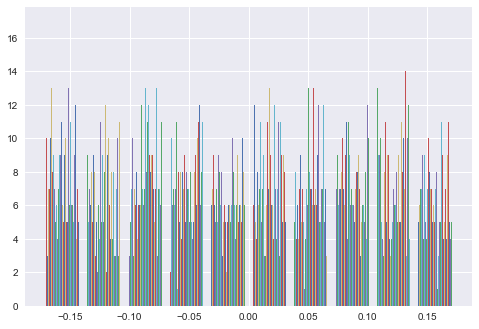

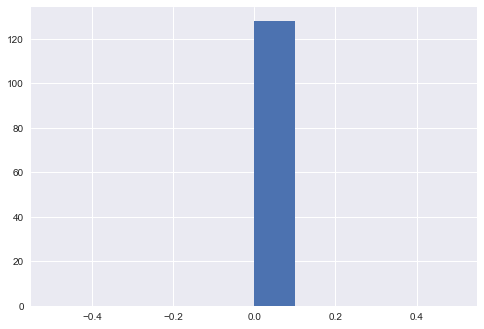

INFO:root:Training the NN model...


cw: using class 0 weight 0.94189929782497, class 1 weight 1.065739753899816


Train on 19799 samples, validate on 2200 samples
Epoch 1/70
19799/19799 [==============================] - 10s 492us/sample - loss: 0.7122 - acc: 0.5053 - val_loss: 1.1492 - val_acc: 0.4886
Epoch 2/70
19799/19799 [==============================] - 4s 208us/sample - loss: 0.7075 - acc: 0.5190 - val_loss: 1.1045 - val_acc: 0.4986
Epoch 3/70
19799/19799 [==============================] - 6s 287us/sample - loss: 0.7051 - acc: 0.5246 - val_loss: 1.0822 - val_acc: 0.5082
Epoch 4/70
19799/19799 [==============================] - 5s 271us/sample - loss: 0.7020 - acc: 0.5389 - val_loss: 1.0697 - val_acc: 0.5127
Epoch 5/70
19799/19799 [==============================] - 4s 224us/sample - loss: 0.7006 - acc: 0.5427 - val_loss: 1.0596 - val_acc: 0.5073
Epoch 6/70
19799/19799 [==============================] - 5s 229us/sample - loss: 0.6992 - acc: 0.5441 - val_loss: 1.0549 - val_acc: 0.5145
Epoch 7/70
19799/19799 [==============================] - 4s 195us/sample - loss: 0.6983 - acc: 0.5454 - val_l

Epoch 59/70
19799/19799 [==============================] - 4s 177us/sample - loss: 0.6720 - acc: 0.5895 - val_loss: 1.2427 - val_acc: 0.5223
Epoch 60/70
19799/19799 [==============================] - 3s 171us/sample - loss: 0.6720 - acc: 0.5879 - val_loss: 1.2485 - val_acc: 0.5241
Epoch 61/70
19799/19799 [==============================] - 4s 199us/sample - loss: 0.6709 - acc: 0.5914 - val_loss: 1.2588 - val_acc: 0.5250
Epoch 62/70
19799/19799 [==============================] - 4s 185us/sample - loss: 0.6710 - acc: 0.5898 - val_loss: 1.2584 - val_acc: 0.5245
Epoch 63/70
19799/19799 [==============================] - 3s 175us/sample - loss: 0.6720 - acc: 0.5916 - val_loss: 1.2576 - val_acc: 0.5286
Epoch 64/70
19799/19799 [==============================] - 4s 192us/sample - loss: 0.6705 - acc: 0.5905 - val_loss: 1.2697 - val_acc: 0.5241
Epoch 65/70
19799/19799 [==============================] - 4s 179us/sample - loss: 0.6702 - acc: 0.5924 - val_loss: 1.2744 - val_acc: 0.5345
Epoch 66/70
1

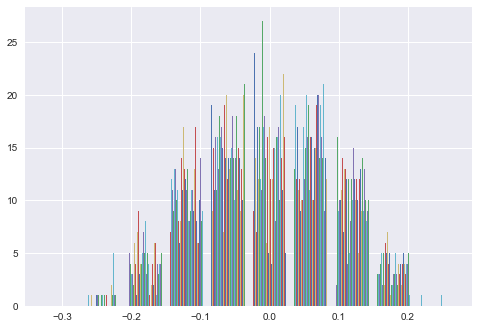

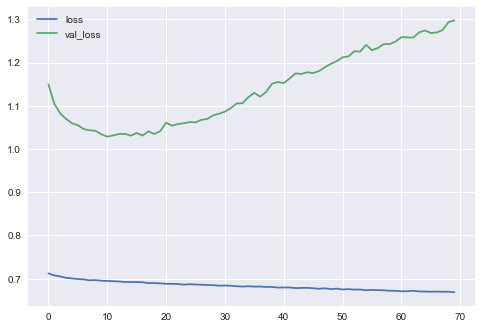

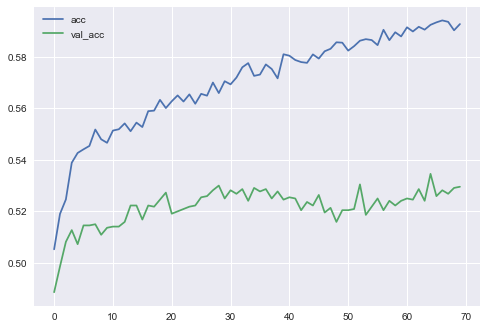

INFO:root:Evaluating the NN model...




main: Evaluating the model on in-sample data (training data)


21999/21999 [==============================] - 4s 198us/sample - loss: 0.7209 - acc: 0.6118
main: valuating the model on out-of-sample data (test data)


4125/4125 [==============================] - 1s 139us/sample - loss: 0.7000 - acc: 0.5314


INFO:root:Predictions with the NN model...


main: just testing predictions for later trading applications


21999/21999 [==============================] - 2s 81us/sample


INFO:root:Saving the NN model...
INFO:root:trainer: specific model folder does not exist: creating it...


[[0.53547585]
 [0.45422179]
 [0.5411985 ]
 ...
 [0.387413  ]
 [0.53059894]
 [0.41503304]]
main:Trained model save to /Users/ANDREA/PycharmProjects/OandaTrading//TrainedModels/EUR_NOK//DNN_model.h5


<Figure size 576x396 with 0 Axes>

In [9]:
# Todo: do this selection better and not via string. This should reference via dict to the model
model_id = "dnn1"
model_trainer = trainer.DL_Trainer(cfginst, model_id)

logging.info("Loading data and creating the NN model...")
model_trainer.load_train_data()
model_trainer.set_model()

logging.info("Training the NN model...")
model_trainer.train_model(epochs=70)

logging.info("Evaluating the NN model...")
model_trainer.evaluate_model()

logging.info("Predictions with the NN model...")
model_trainer.make_predictions()

logging.info("Saving the NN model...")
model_trainer.save_model()

## Trade or Test Strategy

In [10]:
#load params for data standardization
params = pickle.load(open(namefiles_dict["params"], "rb"))
mu = params["mu"]
std = params["std"]
# load trained model
model = keras.models.load_model(cfg.trained_models_path +
                                instrument + "/DNN_model.h5")
# create trader object using instrument configuration details

In [11]:
print("Layers of model being used are: ")
print(model.layers)
trader = t.DNNTrader(cfg.conf_file,
                   instrument=instrument,
                   bar_length=cfginst.brl,
                   window=cfginst.window,
                   lags=cfginst.lags,
                   units=cfginst.units,
                   model=model,
                   mu=mu, std=std,
                   hspread_ptc=cfginst.hspread_ptc,
                   sma_int=cfginst.sma_int,
                   features=cfginst.features,
                   h_prob_th=cfginst.higher_go_long,
                   l_prob_th=cfginst.lower_go_short)

Layers of model being used are: 
[<tensorflow.python.keras.layers.core.Dense object at 0x1549f3950>, <tensorflow.python.keras.layers.core.Dropout object at 0x14a47ad90>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x148ae6d90>, <tensorflow.python.keras.layers.core.Dense object at 0x14efda750>, <tensorflow.python.keras.layers.core.Dropout object at 0x14ef34e10>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x14ef34110>, <tensorflow.python.keras.layers.core.Dense object at 0x1509bad50>, <tensorflow.python.keras.layers.core.Dropout object at 0x1509bae10>, <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x150a07e50>, <tensorflow.python.keras.layers.core.Dense object at 0x1509f7dd0>]


In [14]:
# either live trading or testing (back or fw testing)
TRADING = 0
BCKTESTING, FWTESTING = (0,1) if not TRADING else (0,0)


SEQUENCE: predict


outperf is  -0.002828815652138661
plotting cumulative results of buy&hold and strategy


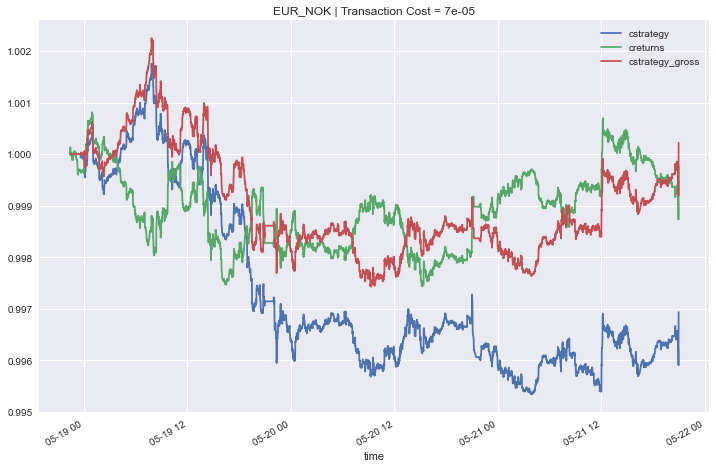

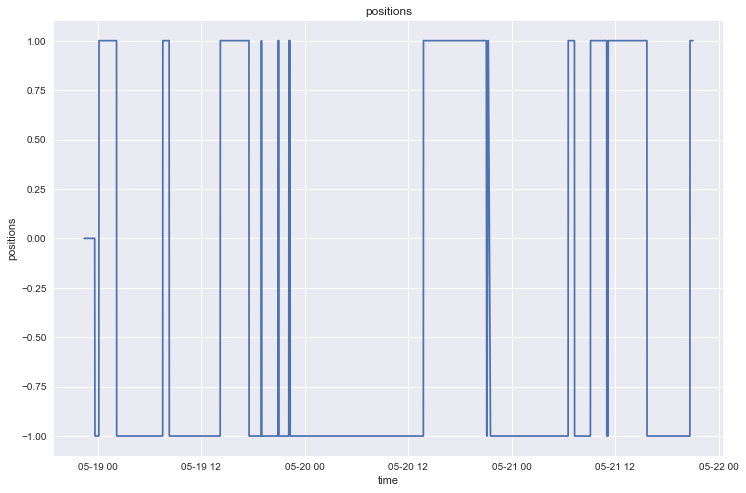

In [15]:
if TRADING:
    trader.get_most_recent(days=cfginst.days_inference, granul=cfginst.granul)  # get historical data
    logging.info("main: most recent historical data obtained and resampled" +
                 "now starting streaming data and trading...")
    trader.stream_data(cfginst.instrument, stop=cfginst.stop_trading)  # streaming & trading here!!!!

    if trader.position != 0:
        print("Closing position as we are ending trading!")
        close_order = trader.create_order(instrument=cfginst.instrument,
                                          units=-trader.position * trader.units,
                                          suppress=True, ret=True)  # close Final Position
        trader.report_trade(close_order, "GOING NEUTRAL")  # report Final Trade
else: # TESTING
    # loading data
    assert os.path.exists(namefiles_dict["base_data_folder_name"]), "Base data folder DO NOT exists!"
    train_data = pd.read_csv(namefiles_dict["train_filename"],
                             index_col="time", parse_dates=True, header=0)
    test_data = pd.read_csv(namefiles_dict["test_filename"],
                            index_col="time", parse_dates=True, header=0)
    # valid not used for now, using keras support but that uses
    # std and mean computed on the train+valid data
    train_labels = pd.read_csv(namefiles_dict["train_labl_filename"],
                               index_col="time", parse_dates=True, header=0)
    test_labels = pd.read_csv(namefiles_dict["test_labl_filename"],
                              index_col="time", parse_dates=True, header=0)

    #trader.prepare_data() ### necessary? maybe not if I take data prepared by getpreparedata.py
    if BCKTESTING:
        trader.test(train_data, train_labels)

    else: # fwtesting
        trader.test(test_data, test_labels)

## Notes and tests.... to delete..

In [9]:
import tpqoa


In [10]:
proj_path = "/Users/ANDREA/PycharmProjects/OandaTrading/"
config_path = proj_path + "configs/"
data_path = proj_path + "Data/"
trained_models_path = proj_path + "TrainedModels/"

# configuration file for oanda access
conf_file = config_path + "oanda.cfg"


In [11]:
api_oanda = tpqoa.tpqoa(conf_file)

In [15]:
inst_list = api_oanda.get_instruments()
print(inst_list)

[('AUD/CAD', 'AUD_CAD'), ('AUD/CHF', 'AUD_CHF'), ('AUD/HKD', 'AUD_HKD'), ('AUD/JPY', 'AUD_JPY'), ('AUD/NZD', 'AUD_NZD'), ('AUD/SGD', 'AUD_SGD'), ('AUD/USD', 'AUD_USD'), ('Australia 200', 'AU200_AUD'), ('Brent Crude Oil', 'BCO_USD'), ('Bund', 'DE10YB_EUR'), ('CAD/CHF', 'CAD_CHF'), ('CAD/HKD', 'CAD_HKD'), ('CAD/JPY', 'CAD_JPY'), ('CAD/SGD', 'CAD_SGD'), ('CHF/HKD', 'CHF_HKD'), ('CHF/JPY', 'CHF_JPY'), ('CHF/ZAR', 'CHF_ZAR'), ('China A50', 'CN50_USD'), ('Copper', 'XCU_USD'), ('Corn', 'CORN_USD'), ('EUR/AUD', 'EUR_AUD'), ('EUR/CAD', 'EUR_CAD'), ('EUR/CHF', 'EUR_CHF'), ('EUR/CZK', 'EUR_CZK'), ('EUR/DKK', 'EUR_DKK'), ('EUR/GBP', 'EUR_GBP'), ('EUR/HKD', 'EUR_HKD'), ('EUR/HUF', 'EUR_HUF'), ('EUR/JPY', 'EUR_JPY'), ('EUR/NOK', 'EUR_NOK'), ('EUR/NZD', 'EUR_NZD'), ('EUR/PLN', 'EUR_PLN'), ('EUR/SEK', 'EUR_SEK'), ('EUR/SGD', 'EUR_SGD'), ('EUR/TRY', 'EUR_TRY'), ('EUR/USD', 'EUR_USD'), ('EUR/ZAR', 'EUR_ZAR'), ('Europe 50', 'EU50_EUR'), ('France 40', 'FR40_EUR'), ('GBP/AUD', 'GBP_AUD'), ('GBP/CAD', 'GBP_

In [17]:
"Silver" in inst_list

False